In [6]:
import pandas as pd
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  cross_val_predict
from keras import regularizers
import pandas as pd 
from sklearn.feature_selection import RFECV
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
import warnings
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.manifold import TSNE
warnings.filterwarnings("ignore")
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import anderson
from sklearn.model_selection import train_test_split
from scipy.stats import mannwhitneyu
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.pipeline import make_pipeline
from sklearn import preprocessing

In [7]:
import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, SpatialDropout1D, LSTM, BatchNormalization
from keras.layers.wrappers import Bidirectional # new! 
from keras.callbacks import ModelCheckpoint 
import os
from sklearn.metrics import roc_auc_score 
import matplotlib.pyplot as plt 
%matplotlib inline

In [18]:
## FOR RUNNING IN GOOGLE COLAB
#from google.colab import drive
#drive.mount('/gdrive')
#%cd /gdrive

## LOADING THE DATA

In [9]:
data = pd.read_csv('/Users/ankitkothari/Documents/loans_2007.csv')
data_copy=data

In [10]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [11]:
data = data.drop(columns=['id', 'member_id','funded_amnt', 'funded_amnt_inv','sub_grade','emp_title','issue_d','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp','out_prncp', 'out_prncp_inv','zip_code', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt'], axis=1)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 33 columns):
loan_amnt                     42535 non-null float64
term                          42535 non-null object
int_rate                      42535 non-null object
installment                   42535 non-null float64
grade                         42535 non-null object
emp_length                    41423 non-null object
home_ownership                42535 non-null object
annual_inc                    42531 non-null float64
verification_status           42535 non-null object
loan_status                   42535 non-null object
pymnt_plan                    42535 non-null object
purpose                       42535 non-null object
title                         42522 non-null object
addr_state                    42535 non-null object
dti                           42535 non-null float64
delinq_2yrs                   42506 non-null float64
earliest_cr_line              42506 non-null object
in

In [13]:
for i in range(0,33,5):
  print(data.iloc[:,i:i+5].head())

   loan_amnt        term int_rate  installment grade
0     5000.0   36 months   10.65%       162.87     B
1     2500.0   60 months   15.27%        59.83     C
2     2400.0   36 months   15.96%        84.33     C
3    10000.0   36 months   13.49%       339.31     C
4     3000.0   60 months   12.69%        67.79     B
  emp_length home_ownership  annual_inc verification_status  loan_status
0  10+ years           RENT     24000.0            Verified   Fully Paid
1   < 1 year           RENT     30000.0     Source Verified  Charged Off
2  10+ years           RENT     12252.0        Not Verified   Fully Paid
3  10+ years           RENT     49200.0     Source Verified   Fully Paid
4     1 year           RENT     80000.0     Source Verified      Current
  pymnt_plan         purpose                 title addr_state    dti
0          n     credit_card              Computer         AZ  27.65
1          n             car                  bike         GA   1.00
2          n  small_business  real es

## FEATURE ENGINEERING

In [14]:
data['earliest_cr_line']= pd.to_datetime(data['earliest_cr_line'], format='%b-%Y').dt.year


In [15]:
data['loan_status'].value_counts()

Fully Paid                                             33136
Charged Off                                             5634
Does not meet the credit policy. Status:Fully Paid      1988
Current                                                  961
Does not meet the credit policy. Status:Charged Off      761
Late (31-120 days)                                        24
In Grace Period                                           20
Late (16-30 days)                                          8
Default                                                    3
Name: loan_status, dtype: int64

In [16]:
### WE ARE ONLY CONCERNED WITH FULLY PAID OR DEFAULT
not_target = ['Current','Late (31-120 days)','In Grace Period','Late (16-30 days)','Default','Does not meet the credit policy. Status:Fully Paid','Does not meet the credit policy. Status:Charged Off']

In [17]:
## NARROWING DOWN OUR TARGET CATEGORIES
data = data[~data.loan_status.isin(not_target)]
print(data.shape)
mapping = {'Fully Paid':0,'Does not meet the credit policy. Status:Fully Paid':0,'Charged Off':1,'Does not meet the credit policy. Status:Charged Off':1}
data['loan_status']= data['loan_status'].map(mapping)
print(data['loan_status'].value_counts())

(38773, 33)
0.0    33136
1.0     5634
Name: loan_status, dtype: int64


In [0]:
###IDENTIFYING WHICH FEATURE COLUMNS HELP IN MAKING BETTER PREDICTIONS

for column in data.columns:
  uniq= data[column].dropna().unique()
  if len(uniq)>=2:
    print(f'multiple unique values {column} {len(uniq)}')
  else:
    data=data.drop(columns=column)
    print(f'only one unique value {column} {uniq}')

multiple unique values loan_amnt 870
multiple unique values term 2
multiple unique values int_rate 371
multiple unique values installment 15091
multiple unique values grade 7
multiple unique values emp_length 11
multiple unique values home_ownership 5
multiple unique values annual_inc 5234
multiple unique values verification_status 3
multiple unique values loan_status 2
only one unique value pymnt_plan ['n']
multiple unique values purpose 14
multiple unique values title 19365
multiple unique values addr_state 50
multiple unique values dti 2856
multiple unique values delinq_2yrs 11
multiple unique values earliest_cr_line 53
multiple unique values inq_last_6mths 9
multiple unique values open_acc 40
multiple unique values pub_rec 5
multiple unique values revol_bal 21348
multiple unique values revol_util 1088
multiple unique values total_acc 82
only one unique value initial_list_status ['f']
multiple unique values last_credit_pull_d 107
only one unique value collections_12_mths_ex_med [0.]

In [0]:
##DROPPING VALUES WITHOUT ANY TARGET VARIABLE INFORMATION
data = data.dropna(subset=['loan_status'])
print(data.isnull().sum()[data.isnull().sum()>0])

emp_length              1036
title                     11
revol_util                50
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64


In [0]:
data['earliest_cr_line'] = data['earliest_cr_line'].astype(float)

In [0]:
data['pub_rec_bankruptcies'].value_counts()

0.0    36422
1.0     1646
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [0]:
data = data.dropna(subset=['emp_length','title','revol_util','last_credit_pull_d'])
data = data.drop(columns=['pub_rec_bankruptcies'], axis=1)
print(data.isnull().sum())

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
title                  0
addr_state             0
dti                    0
delinq_2yrs            0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
last_credit_pull_d     0
dtype: int64


In [0]:
print(data.dtypes.value_counts())

float64    12
object     11
dtype: int64


In [0]:
## CONTINIOUS FEATURES
float_df = data.select_dtypes(include=['float'])
float_df

,loan_amnt,installment,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc
0,5000.0,162.87,24000.0,0.0,27.65,0.0,1985.0,1.0,3.0,0.0,13648.0,9.0
1,2500.0,59.83,30000.0,1.0,1.00,0.0,1999.0,5.0,3.0,0.0,1687.0,4.0
2,2400.0,84.33,12252.0,0.0,8.72,0.0,2001.0,2.0,2.0,0.0,2956.0,10.0
3,10000.0,339.31,49200.0,0.0,20.00,0.0,1996.0,1.0,10.0,0.0,5598.0,37.0
5,5000.0,156.46,36000.0,0.0,11.20,0.0,2004.0,3.0,9.0,0.0,7963.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
39781,2500.0,78.42,110000.0,0.0,11.33,0.0,1990.0,0.0,13.0,0.0,7274.0,40.0
39782,8500.0,275.38,18000.0,0.0,6.40,1.0,1986.0,1.0,6.0,0.0,8847.0,9.0
39783,5000.0,156.84,100000.0,0.0,2.30,0.0,1998.0,0.0,11.0,0.0,9698.0,20.0
39784,5000.0,155.38,200000.0,0.0,3.72,0.0,1988.0,0.0,17.0,0.0,85607.0,26.0


In [0]:
##CATEGORICAL FEATURES

object_df = data.select_dtypes(include=['object'])
object_df

,term,int_rate,grade,emp_length,home_ownership,verification_status,purpose,title,addr_state,revol_util,last_credit_pull_d
0,36 months,10.65%,B,10+ years,RENT,Verified,credit_card,Computer,AZ,83.7%,Jun-2016
1,60 months,15.27%,C,< 1 year,RENT,Source Verified,car,bike,GA,9.4%,Sep-2013
2,36 months,15.96%,C,10+ years,RENT,Not Verified,small_business,real estate business,IL,98.5%,Jun-2016
3,36 months,13.49%,C,10+ years,RENT,Source Verified,other,personel,CA,21%,Apr-2016
5,36 months,7.90%,A,3 years,RENT,Source Verified,wedding,My wedding loan I promise to pay back,AZ,28.3%,Jan-2016
...,...,...,...,...,...,...,...,...,...,...,...
39781,36 months,8.07%,A,4 years,MORTGAGE,Not Verified,home_improvement,Home Improvement,CO,13.1%,Jun-2010
39782,36 months,10.28%,C,3 years,RENT,Not Verified,credit_card,Retiring credit card debt,NC,26.9%,Jul-2010
39783,36 months,8.07%,A,< 1 year,MORTGAGE,Not Verified,debt_consolidation,MBA Loan Consolidation,MA,19.4%,Jun-2007
39784,36 months,7.43%,A,< 1 year,MORTGAGE,Not Verified,other,JAL Loan,MD,0.7%,Jun-2007


In [0]:
cols = ['home_ownership', 'verification_status', 'emp_length', 'term', 'addr_state']
for col in cols:
  print(data[col].value_counts())
  

RENT        18112
MORTGAGE    16686
OWN          2778
OTHER          96
NONE            3
Name: home_ownership, dtype: int64
Not Verified       16281
Verified           11856
Source Verified     9538
Name: verification_status, dtype: int64
10+ years    8545
< 1 year     4513
2 years      4303
3 years      4022
4 years      3353
5 years      3202
1 year       3176
6 years      2177
7 years      1714
8 years      1442
9 years      1228
Name: emp_length, dtype: int64
 36 months    28234
 60 months     9441
Name: term, dtype: int64
CA    6776
NY    3614
FL    2704
TX    2613
NJ    1776
IL    1447
PA    1442
VA    1347
GA    1323
MA    1272
OH    1149
MD    1008
AZ     807
WA     788
CO     748
NC     729
CT     711
MI     678
MO     648
MN     581
NV     466
SC     454
WI     427
OR     422
AL     420
LA     420
KY     311
OK     285
KS     249
UT     249
AR     229
DC     209
RI     194
NM     180
WV     164
HI     162
NH     157
DE     110
MT      77
AK      76
WY      76
SD      60
VT  

In [0]:
data = data.drop(columns=["last_credit_pull_d", "title",'grade'], axis=1)

In [0]:
mapping_dict = {
        "10+ years": "experienced",
        "9 years": "experienced",
        "8 years": "experienced",
        "7 years": "experienced",
        "6 years": "intermediate",
        "5 years": "intermediate",
        "4 years": "intermediate",
        "3 years": "beginner",
        "2 years": "beginner",
        "1 year": "beginner",
        "< 1 year": "beginner",
        "n/a": "beginner"
}

In [0]:
data['emp_length']= data['emp_length'].map(mapping_dict)
data['int_rate']= data['int_rate'].str.rstrip('%').astype("float")
data['revol_util']= data['revol_util'].str.rstrip('%').astype("float")
data.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000.0,36 months,10.65,162.87,experienced,RENT,24000.0,Verified,0.0,credit_card,AZ,27.65,0.0,1985.0,1.0,3.0,0.0,13648.0,83.7,9.0
1,2500.0,60 months,15.27,59.83,beginner,RENT,30000.0,Source Verified,1.0,car,GA,1.00,0.0,1999.0,5.0,3.0,0.0,1687.0,9.4,4.0
2,2400.0,36 months,15.96,84.33,experienced,RENT,12252.0,Not Verified,0.0,small_business,IL,8.72,0.0,2001.0,2.0,2.0,0.0,2956.0,98.5,10.0
3,10000.0,36 months,13.49,339.31,experienced,RENT,49200.0,Source Verified,0.0,other,CA,20.00,0.0,1996.0,1.0,10.0,0.0,5598.0,21.0,37.0
5,5000.0,36 months,7.90,156.46,beginner,RENT,36000.0,Source Verified,0.0,wedding,AZ,11.20,0.0,2004.0,3.0,9.0,0.0,7963.0,28.3,12.0


In [0]:
data['purpose'].value_counts()

debt_consolidation    17751
credit_card            4911
other                  3711
home_improvement       2808
major_purchase         2083
small_business         1719
car                    1459
wedding                 916
medical                 655
moving                  552
house                   356
vacation                348
educational             312
renewable_energy         94
Name: purpose, dtype: int64

In [0]:
##ONE_HOT ENCODING FOR DUMMY VARIABLE

cat_cols= ["home_ownership", "verification_status", "purpose", "term", 'emp_length', "addr_state"]
dummy_df = pd.get_dummies(data[cat_cols])
data = pd.concat([data, dummy_df], axis=1)
data = data.drop(cat_cols, axis=1)
data

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,emp_length_beginner,emp_length_experienced,...,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,5000.0,10.65,162.87,24000.0,0.0,27.65,0.0,1985.0,1.0,3.0,0.0,13648.0,83.7,9.0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,15.27,59.83,30000.0,1.0,1.00,0.0,1999.0,5.0,3.0,0.0,1687.0,9.4,4.0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,15.96,84.33,12252.0,0.0,8.72,0.0,2001.0,2.0,2.0,0.0,2956.0,98.5,10.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10000.0,13.49,339.31,49200.0,0.0,20.00,0.0,1996.0,1.0,10.0,0.0,5598.0,21.0,37.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,5000.0,7.90,156.46,36000.0,0.0,11.20,0.0,2004.0,3.0,9.0,0.0,7963.0,28.3,12.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,2500.0,8.07,78.42,110000.0,0.0,11.33,0.0,1990.0,0.0,13.0,0.0,7274.0,13.1,40.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39782,8500.0,10.28,275.38,18000.0,0.0,6.40,1.0,1986.0,1.0,6.0,0.0,8847.0,26.9,9.0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39783,5000.0,8.07,156.84,100000.0,0.0,2.30,0.0,1998.0,0.0,11.0,0.0,9698.0,19.4,20.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39784,5000.0,7.43,155.38,200000.0,0.0,3.72,0.0,1988.0,0.0,17.0,0.0,85607.0,0.7,26.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37675 entries, 0 to 39785
Data columns (total 91 columns):
loan_amnt                              37675 non-null float64
int_rate                               37675 non-null float64
installment                            37675 non-null float64
annual_inc                             37675 non-null float64
loan_status                            37675 non-null float64
dti                                    37675 non-null float64
delinq_2yrs                            37675 non-null float64
earliest_cr_line                       37675 non-null float64
inq_last_6mths                         37675 non-null float64
open_acc                               37675 non-null float64
pub_rec                                37675 non-null float64
revol_bal                              37675 non-null float64
revol_util                             37675 non-null float64
total_acc                              37675 non-null float64
home_ownership_MORTGAGE

False positive rate is the number of false positives divided by the number of false positives plus the number of true negatives. This divides all the cases where we thought a loan would be paid off but it wasn't by all the loans that weren't paid off:

fpr = fp / (fp + tn)

True positive rate is the number of true positives divided by the number of true positives plus the number of false negatives. This divides all the cases where we thought a loan would be paid off and it was by all the loans that were paid off:

tpr = tp / (tp + fn)

## Precision = ((True Positive)/(True Positive + False Positive))
## Recall = ((True Positive)/(True Positive + False Negative))

# SETTING UP MODEL EVALUATION CRITERIA

In [0]:
def model_performance(target, predictions):
  fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, sharex=False, sharey=False,figsize=[16,4])
  ax1.bar(x=target.value_counts().index.astype(str), height=target.value_counts().to_list(), data=target, color=['b','r'])

  metric = metrics.confusion_matrix(target,predictions)
  confusion_dataframe = pd.DataFrame(data=metric, index=['Actual_Positive','Actual_Negative'], columns=['Guessed_Positive', 'Guessed_Negative'])
  sns.heatmap(confusion_dataframe, annot=True, fmt="d", cmap="YlGnBu", ax = ax2)

  fpr, tpr, _ = (metrics.roc_curve(target,predictions))
  plt.plot(fpr, tpr)
  

  fpr, tpr, _ = (metrics.roc_curve(target,predictions))
  ax3.plot(fpr, tpr)
  roc_auc = auc(fpr, tpr)
  ax3.plot([0, 1], [0, 1], 'k--', label='AUC = %0.3f'% roc_auc)
  ax3.legend(loc='lower right')
  ax3.plot([0,1],[0,1],'r--')
  ax3.set_xlim([-0.1,1.0])
  ax3.set_ylim([-0.1,1.01])
  ax3.set_ylabel('True Positive Rate')
  ax3.set_xlabel('False Positive Rate')
  plt.tight_layout()
  print(f'Area Under the Curve: {round(roc_auc,2)}')


    
  plt.show()

In [0]:
features = data.drop(columns=['loan_status'],axis=1)
target = data['loan_status']

# SCALING AND NORMALIZING THE DATA

In [0]:
def normalize(subset):
   continious_columns = subset.select_dtypes(include=['float']).columns
   mm_scaler = preprocessing.MinMaxScaler()
   for col in continious_columns:
     subset[col]= mm_scaler.fit_transform(subset[[col]])
   return subset
   

In [0]:
scaled_data = normalize(data)
features_scaled = scaled_data.drop(columns=['loan_status'],axis=1)
target_scaled = scaled_data['loan_status']

In [0]:
rus = RandomUnderSampler(random_state=0)
rus.fit(features_scaled, target_scaled)
features_sc, target_sc = rus.fit_resample(features_scaled, target_scaled)


In [0]:
scaled_data.corr()['loan_status'].sort_values()

term_ 36 months                    -0.171194
verification_status_Not Verified   -0.044048
purpose_credit_card                -0.043337
annual_inc                         -0.038175
purpose_major_purchase             -0.029175
                                      ...   
purpose_small_business              0.078515
revol_util                          0.099547
term_ 60 months                     0.171194
int_rate                            0.210814
loan_status                         1.000000
Name: loan_status, Length: 91, dtype: float64

# XGBOOST CLASSIFIER

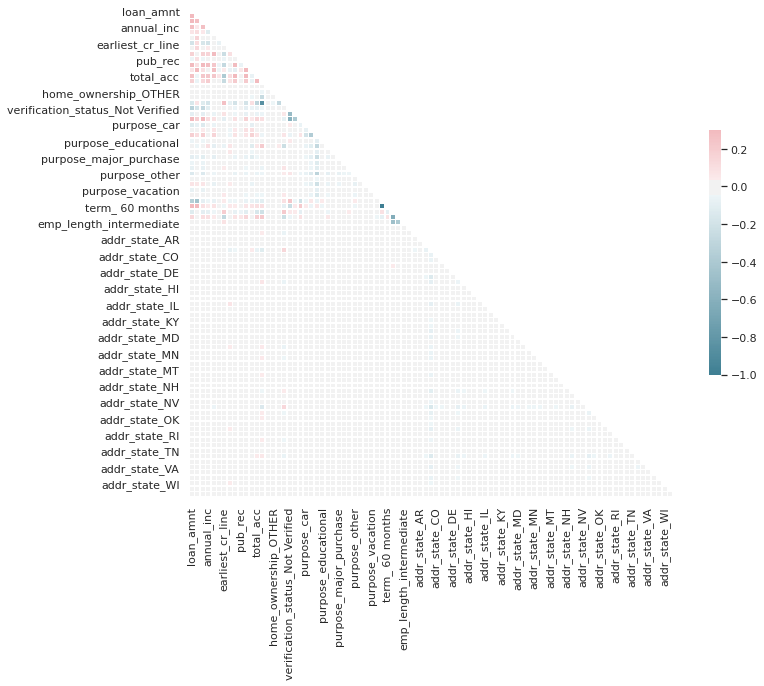

In [0]:
def plot_correlation_heatmap(df):
    corr = df.corr()
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()
plot_correlation_heatmap(features)

In [0]:
features.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'term_ 36 months',
       'term_ 60 months', 'emp_length_beginner', 'emp_length_experienced',
       'emp_length_intermediate', 'addr_state_AK', 'addr_state_AL',
       'addr_state_AR', 'addr_state_AZ', '

In [0]:
features_corr = features.drop(columns=['term_ 60 months','home_ownership_NONE', 'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business','home_ownership_OTHER',
       'purpose_vacation', 'purpose_wedding'],axis=1)

In [0]:
print(features_corr.shape)
print(target.shape)

(37675, 73)
(37675,)


In [0]:
start_time = time.time()
smote = SMOTE(ratio='minority')
features_c, target_c = smote.fit_sample(features_corr, target)
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed


Duration: 0 seconds


In [0]:
features_c[0].round()

array([5.0000e+03, 1.1000e+01, 1.6300e+02, 2.4000e+04, 2.8000e+01,
       0.0000e+00, 1.9850e+03, 1.0000e+00, 3.0000e+00, 0.0000e+00,
       1.3648e+04, 8.4000e+01, 9.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00])

# **XGBOOST HYPERPARAMETER**

*   1)objective='binary:logistic' for binary classification and 'objective': 'multi:softmax' softmax for multiclass classification you also need to set num_class(number of classes)
*   2)subsample=0.8 = subsample, which is for each tree the % of rows taken to build the tree.
*   3)colsample_bytree: number of columns used by each tree.
*   4)max_depth = It represents the depth of each tree, which is the maximum number of different features used in each tree.
*   5)n_estimator = maximun number of decision tress.
*   6) booster parameter allows you to set the type of model you will use when building the ensemble. The default is gbtree which builds an ensemble of decision trees. If your data isn’t too complicated, you can go with the faster and simpler gblinear option which builds an ensemble of linear models.
*   7) The gamma parameter can also help with controlling overfitting. It specifies the minimum reduction in the loss required to make a further partition on a leaf node of the tree.
*   8)scoring: "f1" pr "accuracy"
*   9)scale_pos_weight parameter impose greater penalties for errors on the minor class



















In [0]:
import time
import xgboost as xgb
start_time = time.time()
X_train, X_test, Y_train, Y_test = train_test_split(features_c, target_c, test_size=0.33)
model = xgb.XGBClassifier(learning_rate=0.01, max_depth=7, n_estimators=100,  gamma=5,colsample_bytree=.6, subsample=0.8, scoring = 'f1',scale_pos_weight=1)
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed


Duration: 0 seconds


In [0]:
eval_set = [(X_train, Y_train), (X_test, Y_test)]
eval_metric = ["auc","error"]
model.fit(X_train,Y_train, eval_metric=eval_metric, verbose=False, eval_set=eval_set)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=5,
              learning_rate=0.01, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, scoring='f1',
              seed=None, silent=None, subsample=0.8, verbosity=1)

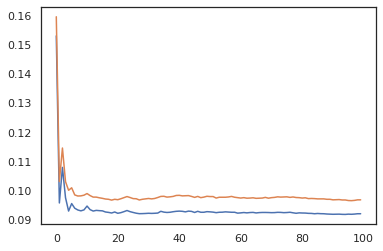

In [0]:
error_train = model.evals_result()['validation_0']['error']
error_test =  model.evals_result()['validation_1']['error']
plt.plot(range(len(error_train)), error_train)
plt.plot(range(len(error_test)), error_test)

Area Under the Curve: 0.9


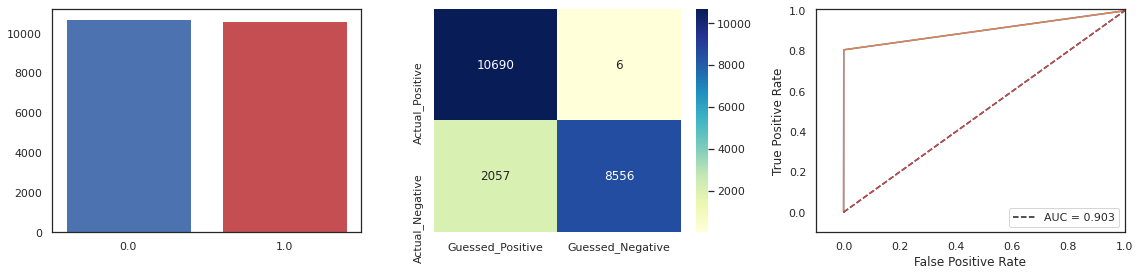

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91     10696
         1.0       1.00      0.81      0.89     10613

    accuracy                           0.90     21309
   macro avg       0.92      0.90      0.90     21309
weighted avg       0.92      0.90      0.90     21309

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.6, 'gamma': 5, 'learning_rate': 0.01, 'max_delta_step': 0, 'max_depth': 7, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 0.8, 'verbosity': 1, 'scoring': 'f1'}
[0.00357732 0.02393022 0.00330963 0.00492637 0.00176198 0.00450659
 0.00200526 0.13017781 0.00169807 0.00661582 0.00214192 0.00411488
 0.00157176 0.03295233 0.00460111 0.04784004 0.07646079 0.02332407
 0.03162681 0.3881257  0.04753219 0.04031256 0.02795806 0.0012

In [0]:
predictions = model.predict(X_test)
model_performance(pd.Series(Y_test), pd.Series(predictions))
print(metrics.classification_report(Y_test,predictions))
print(model.get_xgb_params())
print(model.feature_importances_)
print("Precision = {}".format(precision_score(Y_test, predictions, average='macro')))
print("Recall = {}".format(recall_score(Y_test, predictions, average='macro')))
print("Accuracy = {}".format(accuracy_score(Y_test, predictions)))
print(metrics.confusion_matrix(Y_test, predictions))

In [0]:
y_hat = model.predict_proba(X_test)

In [0]:
y_hat = y_hat.reshape(-1,)

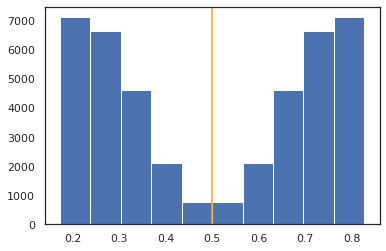

In [0]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

# MODELING IN KERAS FOR BINARY CLASSIFICATION

## CONVERTING TO NUMPY ARRAYS

In [0]:
def standardize(subset):
   continious_columns = subset.select_dtypes(include=['float']).columns
   mm_scaler = preprocessing.StandardScaler()
   for col in continious_columns:
     subset[col]= mm_scaler.fit_transform(subset[[col]])
   return subset

In [0]:
features_np = standardize(features).values
target_np = target.values
print(f'features shape: {features_np.shape}')
print(f'target shape: {target_np.shape}')

features shape: (37675, 90)
target shape: (37675,)


In [0]:
features_np

array([[-0.83476302, -0.35903013, -0.77647201, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17407407,  0.89345228, -1.26979759, ...,  0.        ,
         0.        ,  0.        ],
       [-1.18764651,  1.08051134, -1.15249871, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.83476302, -1.05846836, -0.8053419 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.83476302, -1.23197242, -0.81233195, ...,  0.        ,
         0.        ,  0.        ],
       [-0.49545196,  0.48138014, -0.33332162, ...,  0.        ,
         0.        ,  0.        ]])

In [0]:
features_np_scaled = standardize(pd.DataFrame(features_c)).values
target_np_scaled = target_c
print(f'features shape: {features_np_scaled.shape}')
print(f'features type: {type(features_np_scaled)}')
print(f'target shape: {target_np_scaled.shape}')
features_np_scaled

features shape: (64572, 73)
features type: <class 'numpy.ndarray'>
target shape: (64572,)


array([[-0.8665028 , -0.5960398 , -0.80631846, ..., -0.11511506,
        -0.06655005, -0.03817717],
       [-1.1943888 ,  0.69630217, -1.29988344, ..., -0.11511506,
        -0.06655005, -0.03817717],
       [-1.20750424,  0.88931428, -1.18252764, ..., -0.11511506,
        -0.06655005, -0.03817717],
       ...,
       [-0.23757378,  0.05043853, -0.00598261, ..., -0.11511506,
        -0.06655005, -0.03817717],
       [-1.08222715,  0.07636797, -1.04372552, ..., -0.11511506,
        -0.06655005, -0.03817717],
       [-1.1288116 , -0.21141638, -1.10891544, ..., -0.11511506,
        -0.06655005, -0.03817717]])

In [0]:
xk_train, xk_test, yk_train, yk_test  = train_test_split(features_np_scaled,target_np_scaled,test_size=0.2,random_state=33)
print(xk_train.shape)
print(yk_train.shape)


(51657, 73)
(51657,)


In [0]:
xk_train[0:2]

array([[-4.73039605e-01, -3.47082147e-01, -3.22046143e-01,
        -2.89953384e-01, -8.88932057e-01,  1.79839527e+00,
         3.42491148e-01,  5.06449082e-02, -7.01992861e-02,
        -2.80579805e-01, -8.04805889e-01, -1.76352061e+00,
        -8.17141217e-01, -9.25677049e-01, -3.06431065e-01,
         1.08589636e+00,  1.27479744e+00, -6.31221088e-01,
        -7.51501058e-01,  7.46597683e-01,  1.26070132e+00,
        -7.89487839e-01, -5.85726793e-01, -5.20421407e-02,
        -1.07963175e-01, -7.97127361e-02, -1.58304176e-01,
        -5.18425451e-01, -1.47853879e-01, -1.44492974e-01,
        -6.89301874e-02, -5.53832983e-02, -3.19309626e-01,
        -2.12642837e-01, -7.30295605e-02, -8.79993974e-03,
        -1.45782324e-02, -2.14186017e-01, -1.18067238e-02,
        -8.15665545e-02, -9.67352720e-02, -1.07917377e-01,
        -1.93932238e-01, -1.80911188e-01, -6.81629844e-03,
        -1.42834035e-01, -1.33047289e-01, -1.46113148e-01,
        -2.20608804e-02, -4.80938147e-02, -1.53813730e-0

In [0]:
model = Sequential()
model.add(Dense(78, activation='relu', kernel_initializer='normal', input_shape=(73,)))
#model.add(Dropout(0.5))
model.add(Dense(39,kernel_initializer='normal', activation='relu'))
model.add(Dense(19,kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
model.summary()






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 78)                5772      
_________________________________________________________________
dense_2 (Dense)              (None, 39)                3081      
_________________________________________________________________
dense_3 (Dense)              (None, 19)                760       
_________________________________________________________________
batch_normalization_1 (Batch (None, 19)                76        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 20        
Total params: 9,709
Trainable params: 9,671
Non-trainable params: 38
_________________________________________________________________


Choosing an optimizer and loss
Keep in mind what kind of problem you are trying to solve:

# For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# For a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# For a mean squared error regression problem
model.compile(optimizer='rmsprop',
              loss='mse')

In [0]:
from keras import optimizers
rms = keras.optimizers.RMSprop(lr=0.01, rho=0.9)
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
sgd = optimizers.SGD(lr=0.01, clipnorm=1.)
model.compile(loss='binary_crossentropy', optimizer=rms, metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Sample: one element of a dataset.
Example: one image is a sample in a convolutional network
Example: one audio file is a sample for a speech recognition model
Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

# EARLY STOPPING

Stop training when a monitored quantity has stopped improving.

Arguments:
    monitor: Quantity to be monitored.
    min_delta: Minimum change in the monitored quantity
        to qualify as an improvement, i.e. an absolute
        change of less than min_delta, will count as no
        improvement.
    patience: Number of epochs with no improvement
        after which training will be stopped.
    verbose: verbosity mode.
    mode: One of `{"auto", "min", "max"}`. In `min` mode,
        training will stop when the quantity
        monitored has stopped decreasing; in `max`
        mode it will stop when the quantity
        monitored has stopped increasing; in `auto`
        mode, the direction is automatically inferred
        from the name of the monitored quantity.

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [0]:
model.fit(xk_train, yk_train, 
          batch_size=256, epochs=100, verbose=1, 
          validation_data=(xk_test, yk_test),
          callbacks=[early_stop])




Train on 51657 samples, validate on 12915 samples
Epoch 1/100





51657/51657 [==============================] - 1s 23us/step - loss: 0.4908 - acc: 0.7587 - val_loss: 1.7788 - val_acc: 0.5636
Epoch 2/100
51657/51657 [==============================] - 1s 11us/step - loss: 0.3887 - acc: 0.8222 - val_loss: 1.6784 - val_acc: 0.6359
Epoch 3/100
51657/51657 [==============================] - 1s 11us/step - loss: 0.3625 - acc: 0.8360 - val_loss: 1.1024 - val_acc: 0.7142
Epoch 4/100
51657/51657 [==============================] - 1s 11us/step - loss: 0.3473 - acc: 0.8460 - val_loss: 1.0996 - val_acc: 0.7237
Epoch 5/100
51657/51657 [==============================] - 1s 11us/step - loss: 0.3357 - acc: 0.8519 - val_loss: 1.0769 - val_acc: 0.7375
Epoch 6/100
51657/51657 [==============================] - 1s 11us/step - loss: 0.3299 - acc: 0.8544 - val_loss: 0.7304 - val_acc: 0.7792
Epoch 7/100
51657/51657 [==============================] - 1s 10us/step - loss: 0.3197 - acc: 0.8604 - val_loss: 0

In [0]:
from tensorflow.keras.models import load_model
model.save('/gdrive/My Drive/files/full_data_project_model.h5')  

In [0]:
losses = pd.DataFrame(model.history.history)

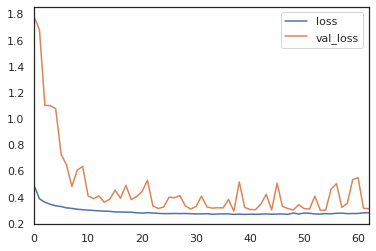

In [0]:
losses[['loss','val_loss']].plot()

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = model.predict_classes(xk_test)

In [0]:
predictions= predictions.reshape(-1,)
predictions

array([0, 0, 1, ..., 1, 1, 0], dtype=int32)

Area Under the Curve: 0.87


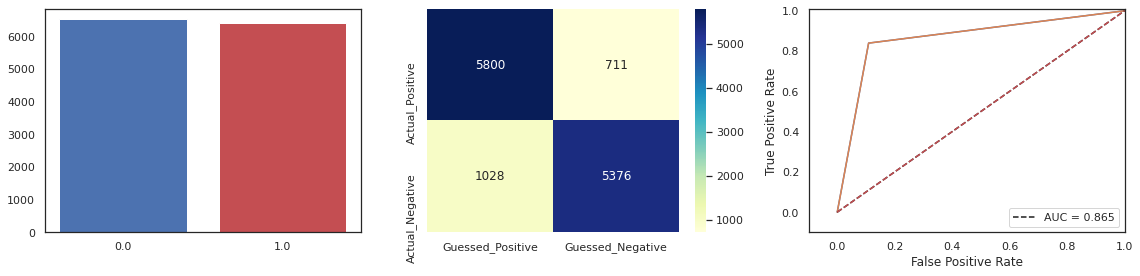

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      6511
         1.0       0.88      0.84      0.86      6404

    accuracy                           0.87     12915
   macro avg       0.87      0.87      0.87     12915
weighted avg       0.87      0.87      0.87     12915



In [0]:
model_performance(pd.Series(yk_test), pd.Series(predictions))
print(metrics.classification_report(yk_test,predictions))

In [0]:
y_hat = model.predict_proba(xk_test)

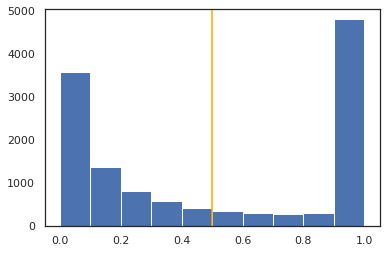

In [0]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

## EVALUATING THE PREDICTIONS AND IDENTIFYING WHERE IS THE MODEL DOING A BAD JOB

In [0]:
y_hat = pd.Series(y_hat.reshape(-1,), name='y_hat')


In [0]:
new_data = pd.concat([data,y_hat], axis=1)
new_data.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'term_ 36 months',
       'term_ 60 months', 'emp_length_beginner', 'emp_length_experienced',
       'emp_length_intermediate', 'addr_state_AK', 'addr_state_AL',
       'addr_state_AR', 'ad

In [0]:
new_data = new_data.rename(columns={0:'y_hat'})
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39067 entries, 0 to 39785
Data columns (total 92 columns):
loan_amnt                              37675 non-null float64
int_rate                               37675 non-null float64
installment                            37675 non-null float64
annual_inc                             37675 non-null float64
loan_status                            37675 non-null float64
dti                                    37675 non-null float64
delinq_2yrs                            37675 non-null float64
earliest_cr_line                       37675 non-null float64
inq_last_6mths                         37675 non-null float64
open_acc                               37675 non-null float64
pub_rec                                37675 non-null float64
revol_bal                              37675 non-null float64
revol_util                             37675 non-null float64
total_acc                              37675 non-null float64
home_ownership_MORTGAGE

In [0]:
new_data_fn = new_data[(new_data['loan_status']==1) & (new_data['y_hat']<0.2)].index
new_data_fn = data_copy.iloc[new_data_fn]
new_data_fn = pd.concat([new_data_fn, y_hat], axis=1)
new_data_fn.dropna()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,y_hat
1,1077430,1314167.0,2500.0,2500.0,2500.000000,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1008.71,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-2013,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,0.137484
9,1071570,1306721.0,5375.0,5375.0,5350.000000,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-2011,Charged Off,n,other,Building my credit history.,774xx,TX,18.08,0.0,Sep-2004,0.0,2.0,0.0,9279.0,36.5%,3.0,f,0.0,0.0,1476.19,1469.34,673.48,533.42,0.00,269.29,2.5200,Nov-2012,121.45,Mar-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,0.080214
64,1069126,1303778.0,10000.0,10000.0,9975.000000,60 months,10.65%,215.69,B,B2,CEC ENTERTAINMENT INC,10+ years,RENT,45996.0,Verified,Dec-2011,Charged Off,n,debt_consolidation,Consolidation,440xx,OH,21.73,0.0,May-1997,1.0,7.0,0.0,11170.0,30.1%,15.0,f,0.0,0.0,8772.91,8751.08,5495.38,2429.23,1.00,847.30,152.5140,Apr-2015,1.00,Jun-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,0.199193
97,1068542,1303143.0,17500.0,17500.0,17500.000000,60 months,17.27%,437.47,D,D3,Travelers Insurance,7 years,MORTGAGE,45000.0,Not Verified,Dec-2011,Charged Off,n,credit_card,Debit Free,992xx,WA,21.31,0.0,Sep-2002,2.0,13.0,0.0,20129.0,86.1%,26.0,f,0.0,0.0,10037.10,10037.10,3077.85,3473.25,0.00,3486.00,625.6170,Apr-2013,437.47,Dec-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,0.104872
120,1068202,1302588.0,25000.0,25000.0,23088.161058,60 months,13.49%,575.12,C,C1,Midnight,10+ years,MORTGAGE,67000.0,Verified,Dec-2011,Charged Off,n,credit_card,"Pay off credit card, refinance house",996xx,AK,14.15,0.0,Aug-1999,0.0,6.0,0.0,15319.0,91.2%,21.0,f,0.0,0.0,23880.65,20309.60,13833.20,8008.11,28.76,2010.58,361.9044,Mar-2015,1179.00,Jul-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,0.018823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12841,791842,996205.0,7000.0,7000.0,7000.000000,36 months,9.99%,225.84,B,B1,SHALIMAR JEWELERS,5 years,RENT,42614.0,Source Verified,Jun-2011,Charged Off,n,credit_card,AUTO,337xx,FL,1.80,0.0,Feb-2007,1.0,10.0,0.0,1924.0,10%,15.0,f,0.0,0.0,5404.04,5404.04,4234.50,1011.39,0.00,158.15,1.5815,Aug-2013,126.13,Nov-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,0.174470
12847,791741,996093.0,18000.0,18000.0,18000.000000,60 months,22.11%,498.27,G,G1,JP Morgan Chase,4 years,RENT,81000.0,Not Verified,Jun-2011,Charged Off,n,credit_card,Refi Loan,100xx,NY,18.25,0.0,Nov-2003,0.0,11.0,0.0,16753.0,90.6%,24.0,f,0.0,0.0,19367.87,19367.87,8035.00,9902.72,0.00,1430.15,14.3015,Sep-2014,498.27,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,0.056063
12861,775996,978302.0,12000.0,12000.0,11984.210942,60 months,10.99%,260.85,B,B3,awnings of hollywood,10+ years,MORTGAGE,55000.0,Source Verified,Jun-2011,Charged Off,n,major_purchase,rv loan,333xx,FL,7.24,0.0,Jun-1992,0.0,6.0,0.0,15468.0,77.3%,16.0,f,0.0,0.0,9006.52,8979.36,5371.48,2697.51,0.00,937.53,9.2017,Feb-2014,260.85,Jul-2014,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,0.043458
12895,790863,995087.0,5000.0,5000.0,5000.000000,36 months,14.79%,172.82,C,C4,paccar parts,6 years,RENT,41000.0,Not Verified,Jun-2011,Ch

In [0]:
new_data_fn['grade'].value_counts()

B    176
C    160
D    132
E     85
A     84
F     52
G     15
Name: grade, dtype: int64

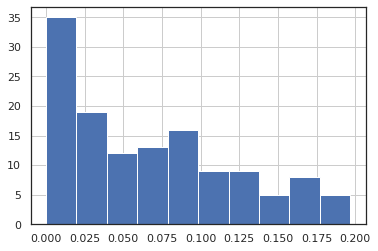

In [0]:
new_data_fn[new_data_fn['addr_state']=='CA']['y_hat'].hist()


In [0]:
new_data_fn.dropna()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,y_hat
1,1077430,1314167.0,2500.0,2500.0,2500.000000,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1008.71,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-2013,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,0.137484
9,1071570,1306721.0,5375.0,5375.0,5350.000000,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-2011,Charged Off,n,other,Building my credit history.,774xx,TX,18.08,0.0,Sep-2004,0.0,2.0,0.0,9279.0,36.5%,3.0,f,0.0,0.0,1476.19,1469.34,673.48,533.42,0.00,269.29,2.5200,Nov-2012,121.45,Mar-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,0.080214
64,1069126,1303778.0,10000.0,10000.0,9975.000000,60 months,10.65%,215.69,B,B2,CEC ENTERTAINMENT INC,10+ years,RENT,45996.0,Verified,Dec-2011,Charged Off,n,debt_consolidation,Consolidation,440xx,OH,21.73,0.0,May-1997,1.0,7.0,0.0,11170.0,30.1%,15.0,f,0.0,0.0,8772.91,8751.08,5495.38,2429.23,1.00,847.30,152.5140,Apr-2015,1.00,Jun-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,0.199193
97,1068542,1303143.0,17500.0,17500.0,17500.000000,60 months,17.27%,437.47,D,D3,Travelers Insurance,7 years,MORTGAGE,45000.0,Not Verified,Dec-2011,Charged Off,n,credit_card,Debit Free,992xx,WA,21.31,0.0,Sep-2002,2.0,13.0,0.0,20129.0,86.1%,26.0,f,0.0,0.0,10037.10,10037.10,3077.85,3473.25,0.00,3486.00,625.6170,Apr-2013,437.47,Dec-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,0.104872
120,1068202,1302588.0,25000.0,25000.0,23088.161058,60 months,13.49%,575.12,C,C1,Midnight,10+ years,MORTGAGE,67000.0,Verified,Dec-2011,Charged Off,n,credit_card,"Pay off credit card, refinance house",996xx,AK,14.15,0.0,Aug-1999,0.0,6.0,0.0,15319.0,91.2%,21.0,f,0.0,0.0,23880.65,20309.60,13833.20,8008.11,28.76,2010.58,361.9044,Mar-2015,1179.00,Jul-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,0.018823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12841,791842,996205.0,7000.0,7000.0,7000.000000,36 months,9.99%,225.84,B,B1,SHALIMAR JEWELERS,5 years,RENT,42614.0,Source Verified,Jun-2011,Charged Off,n,credit_card,AUTO,337xx,FL,1.80,0.0,Feb-2007,1.0,10.0,0.0,1924.0,10%,15.0,f,0.0,0.0,5404.04,5404.04,4234.50,1011.39,0.00,158.15,1.5815,Aug-2013,126.13,Nov-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,0.174470
12847,791741,996093.0,18000.0,18000.0,18000.000000,60 months,22.11%,498.27,G,G1,JP Morgan Chase,4 years,RENT,81000.0,Not Verified,Jun-2011,Charged Off,n,credit_card,Refi Loan,100xx,NY,18.25,0.0,Nov-2003,0.0,11.0,0.0,16753.0,90.6%,24.0,f,0.0,0.0,19367.87,19367.87,8035.00,9902.72,0.00,1430.15,14.3015,Sep-2014,498.27,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,0.056063
12861,775996,978302.0,12000.0,12000.0,11984.210942,60 months,10.99%,260.85,B,B3,awnings of hollywood,10+ years,MORTGAGE,55000.0,Source Verified,Jun-2011,Charged Off,n,major_purchase,rv loan,333xx,FL,7.24,0.0,Jun-1992,0.0,6.0,0.0,15468.0,77.3%,16.0,f,0.0,0.0,9006.52,8979.36,5371.48,2697.51,0.00,937.53,9.2017,Feb-2014,260.85,Jul-2014,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,0.043458
12895,790863,995087.0,5000.0,5000.0,5000.000000,36 months,14.79%,172.82,C,C4,paccar parts,6 years,RENT,41000.0,Not Verified,Jun-2011,Ch

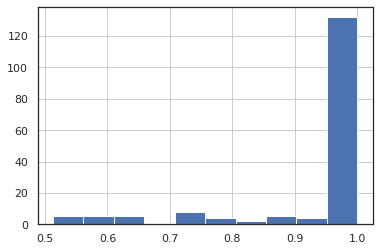

In [0]:
new_data_tp = new_data[(new_data['loan_status']==1) & (new_data['y_hat']>0.5)].index
new_data_tp = data_copy.iloc[new_data_tp]
new_data_tp = pd.concat([new_data_tp, y_hat], axis=1)
new_data_tp['addr_state'].value_counts()
new_data_tp[new_data_tp['addr_state']=='CA']['y_hat'].hist()

In [0]:
new_data_tp.dropna()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,y_hat
21,1039153,1269083.0,21000.0,21000.0,21000.0,36 months,12.42%,701.73,B,B4,Osram Sylvania,10+ years,RENT,105000.0,Verified,Dec-2011,Charged Off,n,debt_consolidation,Debt Cleanup,335xx,FL,13.22,0.0,Feb-1983,0.0,7.0,0.0,32135.0,90.3%,38.0,f,0.0,0.0,14025.40,14025.40,10694.96,3330.44,0.000000,0.00,0.0000,Sep-2013,701.73,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,0.595776
27,1069657,1304764.0,5000.0,5000.0,5000.0,60 months,16.77%,123.65,D,D2,Frito Lay,2 years,RENT,50004.0,Not Verified,Dec-2011,Charged Off,n,other,Other,150xx,PA,13.97,3.0,Oct-2003,0.0,14.0,0.0,4345.0,59.5%,22.0,f,0.0,0.0,1609.12,1609.12,629.05,719.11,0.000000,260.96,2.3000,Dec-2012,123.65,May-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,0.999952
46,1069465,1304521.0,5000.0,5000.0,5000.0,36 months,8.90%,158.77,A,A5,STERIS Corporation,10+ years,MORTGAGE,100000.0,Source Verified,Dec-2011,Charged Off,n,debt_consolidation,Debt Consolidation for a better life,441xx,OH,16.33,0.0,Jun-1995,0.0,17.0,0.0,74351.0,62.1%,35.0,f,0.0,0.0,5021.37,5021.37,4217.38,696.99,0.000000,107.00,1.0700,Aug-2014,158.77,Dec-2014,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,0.665908
53,1069243,1304116.0,12000.0,12000.0,12000.0,36 months,15.96%,421.65,C,C5,Chemat Technology Inc,4 years,RENT,50000.0,Not Verified,Dec-2011,Charged Off,n,car,Car Loan,914xx,CA,20.88,0.0,Oct-2006,2.0,11.0,0.0,15793.0,90.8%,11.0,f,0.0,0.0,3521.95,3521.95,1903.66,1039.35,0.000000,578.94,5.4900,Aug-2012,421.65,Dec-2012,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,1.000000
55,1069410,1303652.0,21000.0,21000.0,20975.0,60 months,19.91%,555.33,E,E4,Costco,7 years,RENT,50000.0,Verified,Dec-2011,Charged Off,n,debt_consolidation,Bill pay of,980xx,WA,21.58,0.0,Sep-1998,1.0,7.0,0.0,19448.0,97.6%,14.0,f,0.0,0.0,18319.14,18297.35,8990.81,9328.33,0.000000,0.00,0.0000,Oct-2014,555.33,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12824,792146,996544.0,20000.0,20000.0,19975.0,60 months,14.79%,473.60,C,C4,The Matworks,3 years,MORTGAGE,66950.0,Verified,Jun-2011,Charged Off,n,debt_consolidation,JB,212xx,MD,24.82,0.0,Jul-1995,2.0,8.0,0.0,27240.0,74.2%,19.0,f,0.0,0.0,3335.58,3331.42,1645.10,1666.82,23.661707,0.00,0.0000,Feb-2012,970.88,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,1.000000
12828,792036,996420.0,22400.0,22400.0,22375.0,60 months,12.99%,509.56,C,C1,Monument Medical Consultants,2 years,MORTGAGE,52800.0,Verified,Jun-2011,Charged Off,n,home_improvement,Well Loan,815xx,CO,2.70,0.0,Jan-1999,3.0,7.0,0.0,1761.0,16.5%,13.0,f,0.0,0.0,8093.66,8084.84,574.78,5859.45,25.282240,1634.15,145.9582,Oct-2013,35.91,Nov-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,0.999204
12878,791139,995412.0,16000.0,16000.0,16000.0,60 months,11.99%,355.84,B,B5,City of Zeigler,10+ years,RENT,32000.0,Source Verified,Jun-2011,Charged Off,n,debt_consolidation,Debt Reconsolidation,628xx,IL,19.13,0.0,May-1999,1.0,9.0,0.0,1904.0,9%,21.0,f,0.0,0.0,10354.32,10354.32,5523.30,3354.95,0.000000,1476.07,20.8525,Aug-2013,355.84,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,0.999999
12888,790956,995195.0,6500.0,6500.0,6500.0,60 months,16.49%,159.77,D,D3,Raytheon,7 years,MORTGAGE,160000.0,Verified,Jun-